<a href="https://colab.research.google.com/github/NgocCanh2002/BTVN/blob/main/nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhandientien/Train', target_size=(128,128), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhandientien/Test', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 1430 images belonging to 11 classes.
Found 220 images belonging to 11 classes.


In [ ]:
training_set.class_indices
test_set.class_indices

{'100000VNĐ': 0,
 '10000VNĐ': 1,
 '1000VNĐ': 2,
 '200000VNĐ': 3,
 '20000VNĐ': 4,
 '2000VNĐ': 5,
 '200VNĐ': 6,
 '500000VNĐ': 7,
 '50000VNĐ': 8,
 '5000VNĐ': 9,
 '500VNĐ': 10}

In [ ]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(1430, 128, 128, 3)
(1430, 11)


In [ ]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)



(220, 128, 128, 3)
(220, 11)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3), padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
45/45 - 11s - loss: 2.4132 - accuracy: 0.0881 - 11s/epoch - 242ms/step
Epoch 2/100
45/45 - 1s - loss: 2.3981 - accuracy: 0.0860 - 809ms/epoch - 18ms/step
Epoch 3/100
45/45 - 1s - loss: 2.3972 - accuracy: 0.0951 - 821ms/epoch - 18ms/step
Epoch 4/100
45/45 - 1s - loss: 2.3719 - accuracy: 0.1287 - 819ms/epoch - 18ms/step
Epoch 5/100
45/45 - 1s - loss: 2.2605 - accuracy: 0.1951 - 821ms/epoch - 18ms/step
Epoch 6/100
45/45 - 1s - loss: 2.0094 - accuracy: 0.2902 - 818ms/epoch - 18ms/step
Epoch 7/100
45/45 - 1s - loss: 1.5730 - accuracy: 0.4608 - 817ms/epoch - 18ms/step
Epoch 8/100
45/45 - 1s - loss: 0.9923 - accuracy: 0.6734 - 819ms/epoch - 18ms/step
Epoch 9/100
45/45 - 1s - loss: 0.4624 - accuracy: 0.8650 - 825ms/epoch - 18ms/step
Epoch 10/100
45/45 - 1s - loss: 0.2223 - accuracy: 0.9497 - 814ms/epoch - 18ms/step
Epoch 11/100
45/45 - 1s - loss: 0.1496 - accuracy: 0.9713 - 829ms/epoch - 18ms/step
Epoch 12/100
45/45 - 1s - loss: 0.0715 - accuracy: 0.9874 - 821ms/epoch - 18ms/step
E

In [ ]:
Score=model.evaluate(x_train,y_train,verbose=2)
print('Sai số: ', Score[0])
print('Độ chính xác: ', Score[1])

45/45 - 1s - loss: 2.9277e-07 - accuracy: 1.0000 - 586ms/epoch - 13ms/step
Sai số:  2.927713182998559e-07
Độ chính xác:  1.0


<function matplotlib.pyplot.show(*args, **kw)>

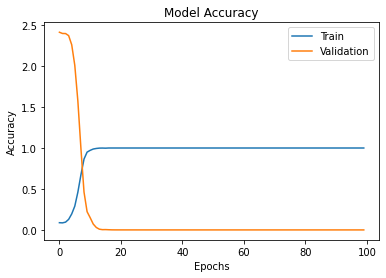

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_tien_CNN.h5")

In [ ]:
model_CNN=load_model('/content/Nhan_dien_tien_CNN.h5')

In [ ]:
class_names = ["100000", "10000", "1000","200000","20000","2000","200","500000","50000","5000","500"]

1/1 [==============================] - 0s 15ms/step
[[4.9830433e-14 3.6782029e-31 2.6466338e-12 6.2420457e-07 5.4984747e-23
  2.8782732e-09 5.1987606e-14 9.3924024e-09 3.9679289e-14 9.9999940e-01
  4.9397811e-28]]
Kết quả:  5000
Độ chính xác:  0.9999994


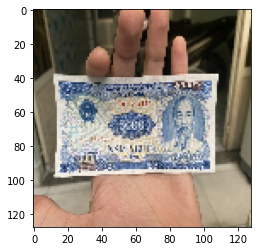

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = '/content/drive/MyDrive/Colab Notebooks/nhandientien/Check/5k_3.jpg'
img = load_img(url, target_size=(128,128,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 128,128,3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 128,128,3)

prediction = model_CNN.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)